In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"


## Loading data 
Reading data from files. 

The data saved as 10 variable from data0 to data9.

Using 70% of each one for train, named from **data0_train** to **data9_train**, 
and the rest for test, named **data0_test** to **data0_test**. 

Merge the train data as **data_train** and label them

In [2]:
for i in range(10):
    locals()['data%d'%i]= np.loadtxt('train.'+str(i)+'.txt',delimiter = ',')

from sklearn.cross_validation import train_test_split
for i in range(10):
    locals()['data%d_train'%i],locals()['data%d_test'%i],locals()['label%d_train'%i],locals()['label%d_test'%i] = train_test_split(
        locals()['data%d'%i], i*np.ones(locals()['data%d'%i].shape[0]), test_size = 0.3, random_state = 0)

# Train Part 
## PCA 
For each digits from 0 to 9, using PCA to extract feature of image of each digits. 

Get 10 feature space for each digits. 

In [3]:
num_components = 30
for i in range(10):
    locals()['pca%d'%i] = PCA(n_components=num_components)
    locals()['pca%d'%i].fit(locals()['data%d_train'%i])

## Plot the mean of each digits 

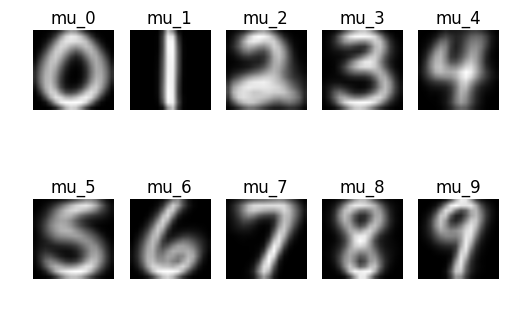

In [4]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title('mu_'+str(i))
    img = np.reshape(locals()['pca%i'%i].mean_,(16,16))
    imgshow = plt.imshow(img,cmap='gray')
    plt.axis('off')   #不显示坐标尺寸

## Demo : The distance of single digit from feature space 
### Digits 3

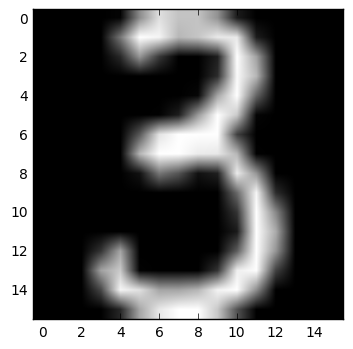

In [5]:
x = data3_test[0,:]
img = np.reshape(x,(16,16)) 
plt.imshow(img,'gray')

### Recover by PCA components

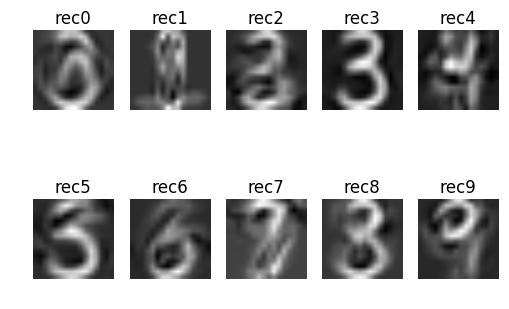

In [6]:
y = np.zeros((x.shape[0],10))
rec = np.zeros((x.shape[0],10))
res = np.zeros((x.shape[0],10))

for i in range(10):
    y[:,i]=  x - locals()['pca%d'%i].mean_
    comp = locals()['pca%d'%i].components_
    rec[:,i] =  locals()['pca%d'%i].mean_ + np.dot(np.transpose(comp),np.dot(comp,y[:,i]))
    res[:,i] = x - rec[:,i]
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title('rec'+str(i))
    img = np.reshape(rec[:,i],(16,16))
    imgshow = plt.imshow(img,cmap='gray')
    plt.axis('off')   #不显示坐标尺寸


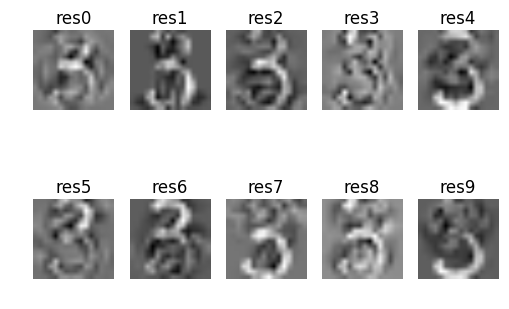

In [7]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title('res'+str(i))
    img = np.reshape(res[:,i],(16,16))
    imgshow = plt.imshow(img,cmap='gray')
    plt.axis('off')   #不显示坐标尺寸

In [8]:
from numpy import linalg as LA 
res_norm = []
for i in range(10):
    res_norm.append(LA.norm([res[:,i]]))
res_norm

print res_norm.index(min(res_norm))

3


In [9]:

confusion_Matrix = np.zeros((10,10))

y = np.zeros((x.shape[0],10))
rec = np.zeros((x.shape[0],10))
res = np.zeros((x.shape[0],10))
for k in range(10):
    for j in range(locals()['data%d_test'%k].shape[0]):
        x = locals()['data%d_test'%k][j,:]
        y = np.zeros((x.shape[0],10))
        rec = np.zeros((x.shape[0],10))
        res = np.zeros((x.shape[0],10))

        for i in range(10):
            y[:,i]=  x - locals()['pca%d'%i].mean_
            comp = locals()['pca%d'%i].components_
            rec[:,i] =  locals()['pca%d'%i].mean_ + np.dot(np.transpose(comp),np.dot(comp,y[:,i]))
            res[:,i] = x - rec[:,i]
        res_norm = []
        for i in range(10):
            res_norm.append(LA.norm([res[:,i]]))
            res_norm
            
        confusion_Matrix[k,res_norm.index(min(res_norm))] += 1
        
        
confusion_Matrix = confusion_Matrix.astype(int) 
    

In [10]:
print confusion_Matrix
import pandas as pd
from pandas.tools.plotting import table

df = pd.DataFrame(confusion_Matrix)
df

[[356   1   0   1   0   1   0   0   0   0]
 [  0 301   0   0   0   0   0   0   1   0]
 [  1   1 213   1   1   0   0   0   3   0]
 [  0   0   0 192   0   3   0   0   2   1]
 [  2   0   2   0 189   0   0   0   0   3]
 [  2   0   0   2   0 158   1   0   2   2]
 [  4   1   0   0   0   2 193   0   0   0]
 [  0   3   2   0   3   0   0 177   1   8]
 [  1   5   2   0   1   3   0   0 149   2]
 [  0   0   0   1   0   0   0   2   1 190]]


0    1    2    3    4    5    6    7    8    9
0  356    1    0    1    0    1    0    0    0    0
1    0  301    0    0    0    0    0    0    1    0
2    1    1  213    1    1    0    0    0    3    0
3    0    0    0  192    0    3    0    0    2    1
4    2    0    2    0  189    0    0    0    0    3
5    2    0    0    2    0  158    1    0    2    2
6    4    1    0    0    0    2  193    0    0    0
7    0    3    2    0    3    0    0  177    1    8
8    1    5    2    0    1    3    0    0  149    2
9    0    0    0    1    0    0    0    2    1  190

In [11]:
total = np.sum(confusion_Matrix)

In [12]:
hit = 0
for i in range(10):
    hit += confusion_Matrix[i,i]
accuracy = hit/total.astype(float)
print accuracy 

0.965800273598


In [13]:

confusion_Matrix = np.zeros((10,10))
error = np.zeros((1,3)) 

y = np.zeros((x.shape[0],10))
rec = np.zeros((x.shape[0],10))
res = np.zeros((x.shape[0],10))
for k in range(10):
    for j in range(locals()['data%d_test'%k].shape[0]):
        x = locals()['data%d_test'%k][j,:]
        y = np.zeros((x.shape[0],10))
        rec = np.zeros((x.shape[0],10))
        res = np.zeros((x.shape[0],10))

        for i in range(10):
            y[:,i]=  x - locals()['pca%d'%i].mean_
            comp = locals()['pca%d'%i].components_
            rec[:,i] =  locals()['pca%d'%i].mean_ + np.dot(np.transpose(comp),np.dot(comp,y[:,i]))
            res[:,i] = x - rec[:,i]
        res_norm = []
        for i in range(10):
            res_norm.append(LA.norm([res[:,i]]))
            res_norm
            
        confusion_Matrix[k,res_norm.index(min(res_norm))] += 1
        if k!=res_norm.index(min(res_norm)):
            error = np.append(error,np.array([k,j,res_norm.index(min(res_norm))]).reshape(1,3),axis = 0)
error = error[1:,:]            
        
        
confusion_Matrix = confusion_Matrix.astype(int) 
error = error.astype(int)

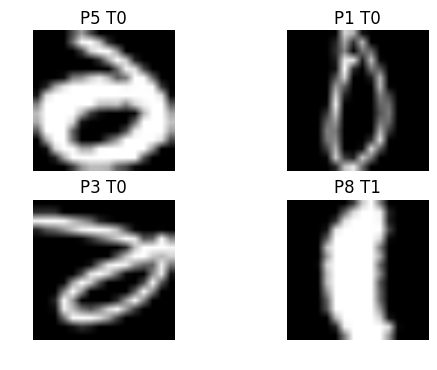

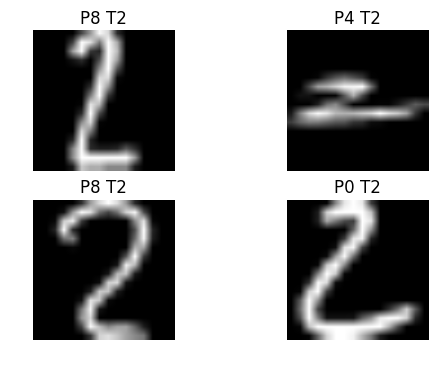

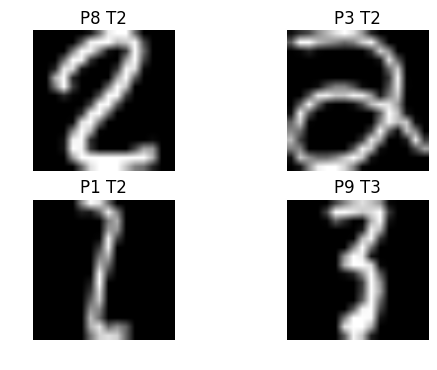

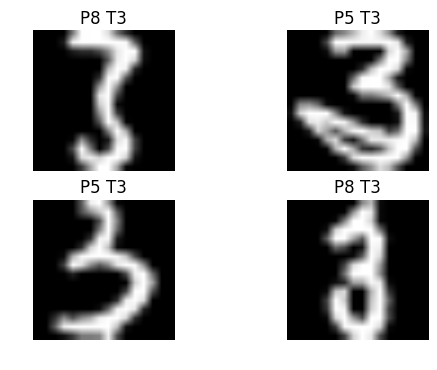

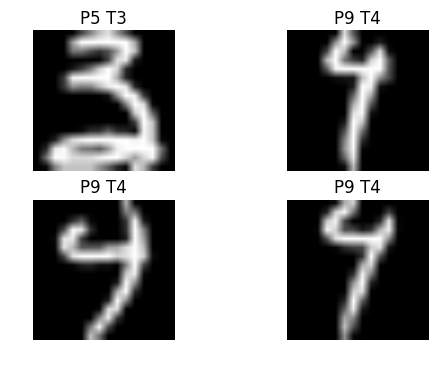

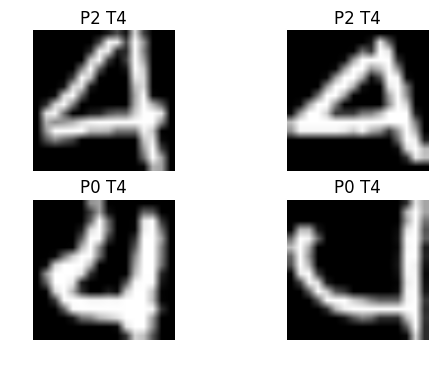

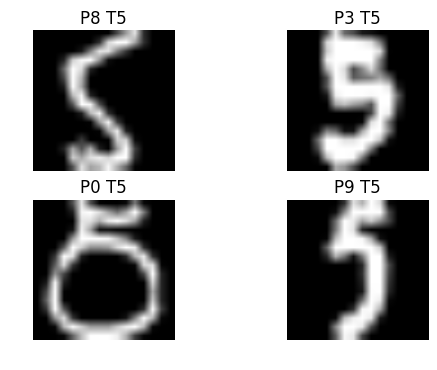

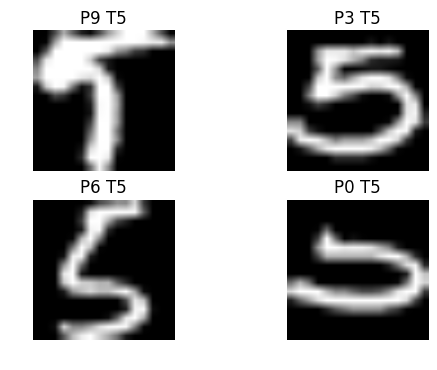

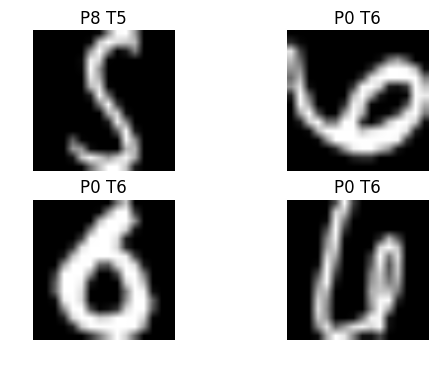

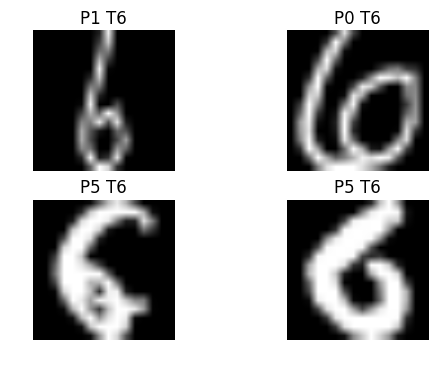

In [14]:
for i in range(10):
    plt.figure(i)
    for j in range(4):
            plt.subplot(2,2,j+1)
            plt.axis('off')   #不显示坐标尺寸
            plt.title('P'+str(error[i*4+j,2])+' T'+str(error[i*4+j,0]))
            z = locals()['data%d_test'%error[i*4+j,0]][error[i*4+j,1],:]
            img = np.reshape(z,(16,16))
            imgshow = plt.imshow(img,cmap='gray')

